<a href="https://www.kaggle.com/code/rohitgadhwar/polynomial-regression-from-scratch?scriptVersionId=110018047" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Why polynomial regression?**
* Many times the relationship between the input features and the output label is non-linear and simple linear models are not adequate to learn such mappings.
* The key idea is to create polynomial features by combining the existing input features.
* And then apply linear regression model on the polynomial feature representation.

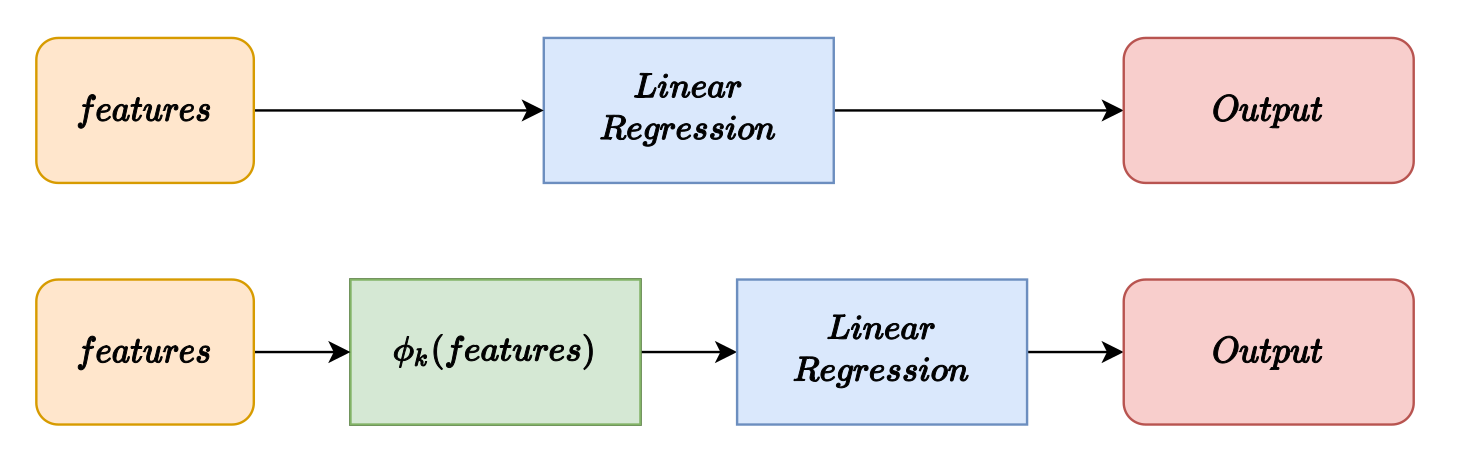

ϕk (features) is called **polynomial transformation** of k -th order.

## **Genrate sample non-linear data**
> y = sin(2*pi*x) + noise

In [2]:
n = 50
X = np.linspace(0,1, n)

def non_linear(x):
    return np.sin(2*np.pi*x)

# obtain y = non_linear_function + noise
y = non_linear(X) + np.random.normal(scale=0.2, size=X.shape)

In [3]:
def visualize_training_data(X_train, y_train):
    points = np.linspace(0,1,100)
    output = non_linear(points)
    f = plt.figure(figsize=(8,5))

    plt.scatter(X_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(points, output, c="g", label="$\sin(2\pi x)$")
    plt.xlabel("$x_1$")
    plt.ylabel("y")
    plt.legend()
    plt.show()

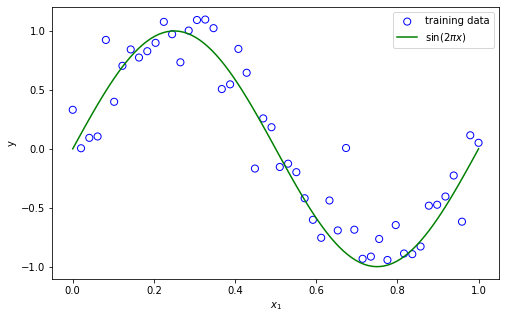

In [4]:
visualize_training_data(X, y)

# **Linear regression without polynomial transformation.**

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X.reshape(-1,1), y)

LinearRegression()

(-1.5, 1.5)

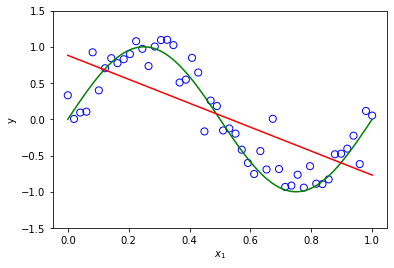

In [6]:
'''plot trained model along with the data generation funct'''
points = np.linspace(0,1,100)
output = non_linear(points)

plt.scatter(X, y, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(points, output, c="g", label="$\sin(2\pi x)$")

y_hat = lr.predict(X.reshape(-1,1))
plt.plot(X, y_hat, c="r", label="$h_\mathbf{w}(x)$")
plt.xlabel("$x_1$")
plt.ylabel('y')
plt.ylim(-1.5, 1.5)

**Linear model underﬁts:** it is not enough to model the relationship
between features and labels as present in the training data.
<br>In this case, validation loss is less than the training loss (which is unusal),
this is due to small amount of the validation data.

## **How can we ﬁx underﬁtting?**
* By **increasing the capacity** of the model to learn non-linear relationship between the features and the label.
* One way to achieve it is through **polynomial transformation** that constructs new features from the existing features.

# **Polynomial regression in single feature**
For training data with a single feature x1 ,
* First use k -th order polynomial transformation to create new features like x^2 , x^3 , … , x^k and
* Use linear regression model to learn relationship between x1 and y .

## **Examples**
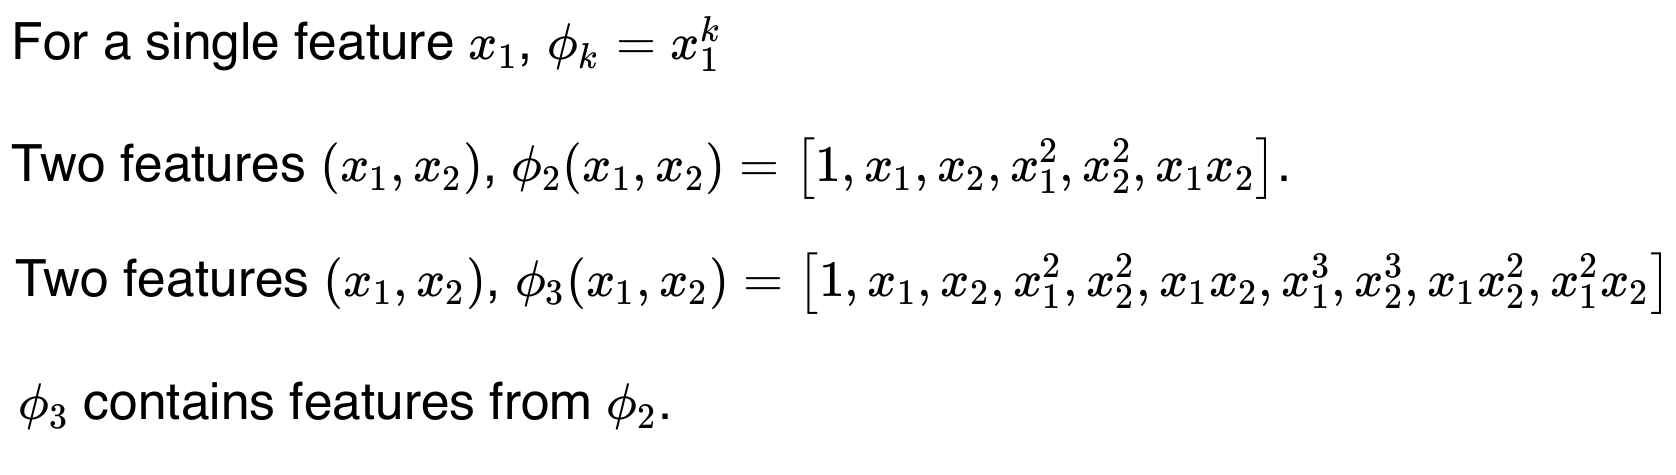

# **Polynomial Transformation: Implementation**

In [7]:
import itertools
import functools

def polynomial_transform(x, degree):
    '''Perform transformation of input x into degree d polynomial features.
    
    Arguments:
        x: Data of shape (n,)
        degree: degree of polynomial
        
    Returns:
        Polynomial transformation of x
    '''
    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = [np.ones(len(x))]
    for degree in range(1, degree+1):
        for items in itertools.combinations_with_replacement(x_t, degree):
            features.append(functools.reduce(lambda x,y:x*y, items))
    return np.asarray(features).transpose()

In [8]:
polynomial_transform(np.array([[1,2],[3,4]]), degree=2)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  3.,  4.,  9., 12., 16.]])

# **Polynomial Model**

In [9]:
degree = 3
X_transform = polynomial_transform(X, degree)
lr = LinearRegression()
lr.fit(X_transform, y)

LinearRegression()

In [10]:
def visualize_model_fit(X, y, model, degree):
    '''plot trained model along with the data generation funct'''
    points = np.linspace(0,1,100)
    output = non_linear(points)
    
    if degree > 0:
        plt.scatter(X, y, facecolor="none", edgecolor="b", s=50, label="training data")
        plt.plot(points, output, c="g", label="$\sin(2\pi x)$", linestyle='dashed')
        
        y_hat = model.predict(polynomial_transform(points, degree))
        plt.plot(points, y_hat, c="r", label="$h_\mathbf{w}(x)$")
        plt.xlabel("$x_1$")
        plt.ylabel('y')
        plt.ylim(-1.5, 1.5)
        plt.title("M={}".format(degree))

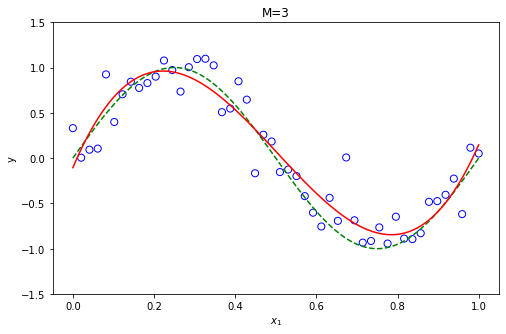

In [11]:
f = plt.figure(figsize=(8,5))
visualize_model_fit(X, y, lr, degree)

### **Let's ﬁt a polynomial model of different orders k = {0, 1, 2, … , 9} on this data.**

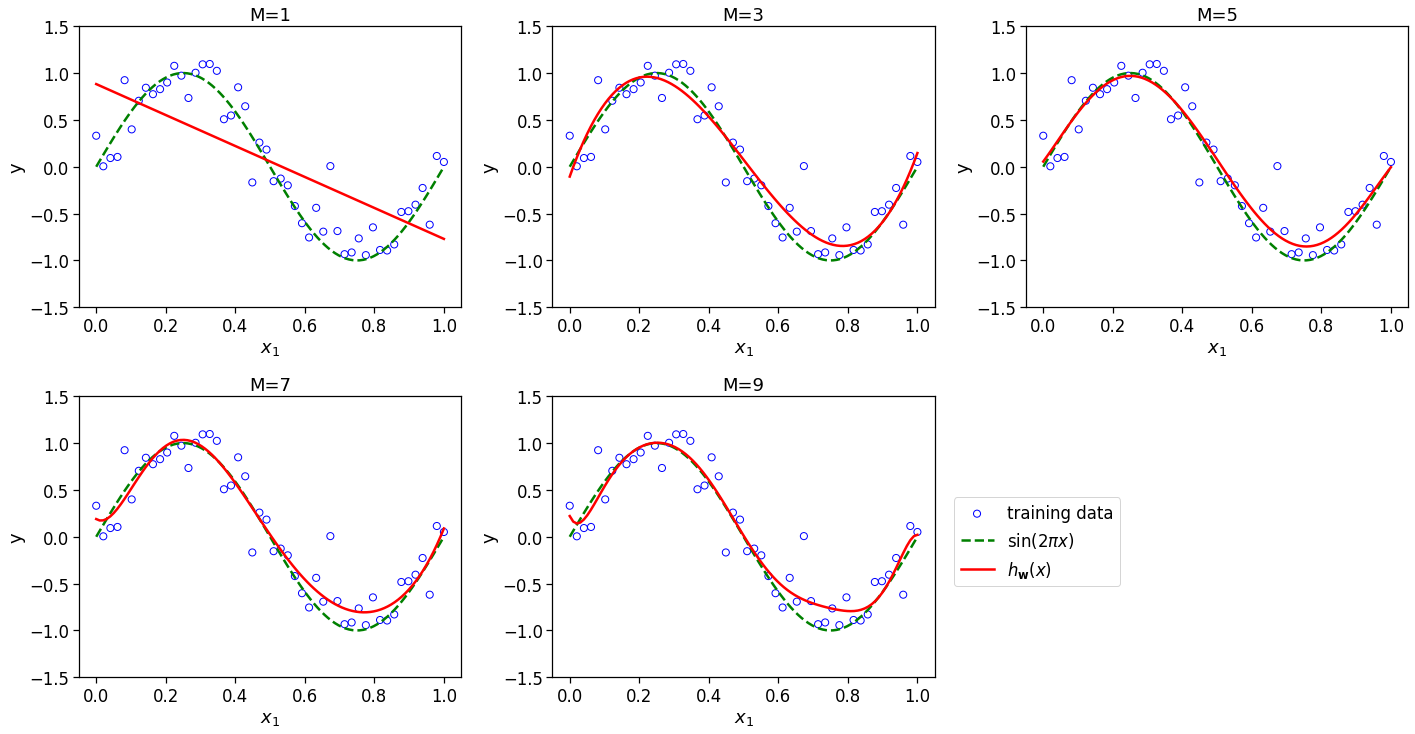

In [12]:
f = plt.figure(figsize=(20,15))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})

for i, degree in enumerate([1,3,5,7,9]):
    plt.subplot(3,3,i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinearRegression()
    lin_reg.fit(X_transform, y)
    visualize_model_fit(X,y, lin_reg, degree)

f.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

* Lower degree (1 and 3) polynomial model: **Underﬁtting.**
* Third order (degree=5) polynomial model: **Reasonable ﬁt.**
* Higher degree ≥ 7 polynomial model: **Overﬁtting.**

# **Model diagnostics: learning curves**
1. Train polynomial model of degrees: {0, 1, … , k}
2. Calculate training and validation RMSE.
3. Plot degree vs. RMSE plot.

In [13]:
from sklearn.metrics import mean_squared_error as mse
def plot_model_selection(training_errors, val_errors):
    plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c='b')
    plt.plot(val_errors, 'o-', mfc="none", mec='r', ms=10, c='r')
    plt.legend()
    plt.xlabel("degree")
    plt.ylabel("RMSE")
    plt.show()

def rmse(pred, y):
    return np.sqrt(mse(pred, y))

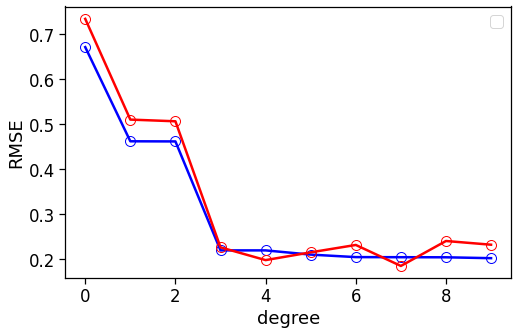

In [14]:
f = plt.figure(figsize=(8,5))

training_errors = []
val_errors = []
w_dict = {}

X_val = np.linspace(0,1,100)
y_val = non_linear(X_val)

for i in range(10):
    X_transform = polynomial_transform(X, i)
    X_val_transform = polynomial_transform(X_val, i)
    lin_reg = LinearRegression()
    lin_reg.fit(X_transform, y)
    
    w_dict[i] = lin_reg.coef_
    training_errors.append(rmse(lin_reg.predict(X_transform), y))
    val_errors.append(rmse(lin_reg.predict(X_val_transform), y_val+np.random.normal(scale=0.2, size=len(y_val))))
    
plot_model_selection(training_errors, val_errors)

* The training and validation errors are close until certain degree.
* After a point, the training error continues to reduce, while the validation error keeps increasing.
* RMSE increases sharply for degrees ≥ 5. This is a signature of overﬁtting.

# **Issues with polynomial regression**
* Higher order polynolial models are **very flexible**, or in other words, they have higher capacity compared to lower order models.
* Hence they are prone to overﬁtting compared to the lower degree polynomials.
* Perfect ﬁt to training data, but poor prediction accuracy on validation data.